# Исследование закономерностей, определяющих успешность игры/ платформы

### Краткое описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br><br>  Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br><br> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Цель исследования</b> - проверить несколько гипотез:<br>
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<b>Ход исследования</b><br><br>
Исторические данные о продажах игр в интернет - магазине «Стримчик», оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) - были получены из файла: /datasets/games.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.
    
В ходе исследования необходимо преобразовать данные в нужные типы, проверить данные на наличие пропуков, а также найти другие ошибки и оценить их влияние на исследование. Затем, после этапа предобработки провести исследовательский анализ данных и проверить гипотезы. 
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Проверка гипотез.
    </div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**1.1. Первые 20 строчек датафрейма**

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**1.2. Основная информация о датафрейме**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1.3. Построение общей гистограммы для всех столбцов датафрейма**

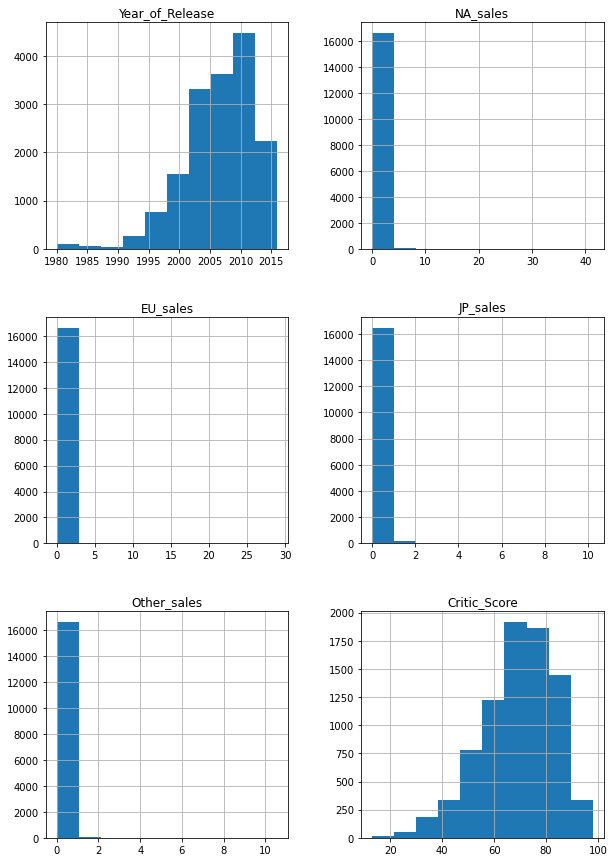

In [5]:
data.hist(figsize =(10,15))
plt.show()

### Предобработка данных

**2.1. Замените названия столбцов (приведите к нижнему регистру)**

In [6]:
# перечень названий столбцов таблицы data
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# переименование столбцов
data = data.rename(columns = {'Name' : 'name' , 'Platform' : 'platform' , 'Year_of_Release' : 'year_of_release' ,'Genre' : 'genre' , 'NA_sales': 'na_sales' , 'EU_sales' : 'eu_sales', 'JP_sales': 'jp_sales' , 'Other_sales': 'other_sales' , 'Critic_Score': 'critic_score' ,'User_Score': 'user_score', 'Rating' : 'rating'})

In [8]:
# проверка результатов - перечень названий столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2. Исследование, заполнение пропусков в данных и изменение типов данных**

In [9]:
#data.isna().sum() #посчитаем количество пропусков в процентах в каждом столбце датафрейма
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [10]:
#удалим пропущенные значения в year_of_release, так как их меньше 5%.
data = data.dropna(subset= ['year_of_release'])

#переведем значения year_of_release из типа float в int
data['year_of_release'] = data['year_of_release'].astype('int')

In [11]:
#заменяем 'tbd' на пропущенные значения и переводим столбец из типа object в тип float 
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16446, dtype: float64

In [12]:
#заменим все пропуски в столбце ratihg на "no_rating"
data['rating'] = data['rating'].fillna('no_rating')
data['rating']

0                E
1        no_rating
2                E
3                E
4        no_rating
           ...    
16710    no_rating
16711    no_rating
16712    no_rating
16713    no_rating
16714    no_rating
Name: rating, Length: 16446, dtype: object

In [13]:
#построим сводную таблицу и проверим с какой частотой встречаются различные значения rating
data_pivot_pr = data.pivot_table(index = ['rating'] ,values = 'name', aggfunc = 'count')
display(data_pivot_pr)

,name
rating,
AO,1
E,3921
E10+,1393
EC,8
K-A,3
M,1536
RP,1
T,2905
no_rating,6676


In [14]:
#посмотрим пропуски в столбцах name и genre            
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [15]:
#удалим пропуски в столбце name, так как их незначительное количество             
data = data.dropna(subset = ['name'])

In [16]:
#удалим пропуски в столбце genre, так как их незначительное количество   
data = data.dropna(subset = ['genre'])

**Вывод по заполнению пропусков**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Проверка на наличие пропусков показала, что пропуски имеются в следующих 4х столбцах: 'year_of_release', 'critic_score', 'user_score' и 'rating'. 
<br>В столбце 'year_of_release' пропущенных значений меньше 5%, удалим их.
<br>В столбцах с рейтингами 'critic_score' и 'user_score' пропуски заполнять не нужно, так как после их заполнения можно получить неточные результаты в статистическом анализе. 
<br>В столбце 'rating' заменим все пропуски на 'no_rating'.
<br>Пропуски лучше заполнять реальными данными, если есть возможность - например, зайти на сайт и попытаться найти информацию или в реальном проекте можно было бы выявить причину появления пропусков, затем попросить программистов восстановить данные, если это возможно. 
    
Причины, которые могли привести к пропускам в исходных данных: человеческий фактор (например при внесении данных, могли случайно нажать пробел, скопировать лишние символы, удалить значения ячеек).   
Также могут быть технические причины появления пропусков (например, неудачно написанный код, по которому происходила загрузка данных с сервера).   
Также, например, пользователь не указал о себе какие-нибудь сведения или автоматизированная система сбора информации дала сбой. Иногда пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами. 
<br> 
Также пользователи могут заполнить в анкетах не все данные. 

</div>

**Вывод по изменению типов данных**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Заменили тип данных в столбцах:
<br>1. 'year_of_release'  из типа float64 на int, так как год выпуска не может быть дробным значением. 
<br>2. 'user_score' из типа object в тип float, так как в столбце содержатся данные перемешанные с int, необходимо привести данные к одному типу float.

**2.3. Обработка явных дубликатов**

In [17]:
#посчитаем явные дубликаты 
data.duplicated().sum()

0

**2.4. Обработка и удаление аномалий(редких значений)**

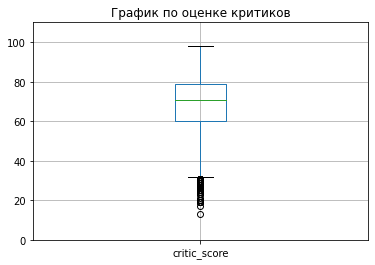

In [18]:
#проверим есть ли аномальные значения по оценке критиков 'critic_score',
data.boxplot('critic_score')
plt.title('График по оценке критиков')
plt.ylim(0, 110);

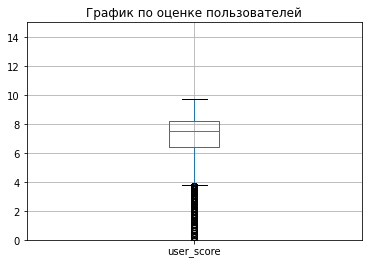

In [19]:
#проверим есть ли аномальные значения по оценке пользователей 'user_score',
data.boxplot('user_score')
plt.title('График по оценке пользователей')
plt.ylim(0, 15);

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Проверили на аномальные значения столбцы:
<br>1. 'critic_score', аномальные значения не выявлены, по условию проекта, все значения находятся в рамках допустимых, т.е. до 100. 
<br>2. 'user_score', аномальные значения не выявлены, по условию проекта, все значения находятся в рамках допустимых, т.е. до 10. 

**2.5. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [20]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


### Проведите исследовательский анализ данных

**3.1 Подсчет количества игр, выпускавшихся в разные годы**

In [21]:
#построим сводную таблицу для подсчета количества игр

data_pivot_year_of_release = data.pivot_table(index = ['year_of_release'], values = 'name', aggfunc = 'count')
display(data_pivot_year_of_release)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


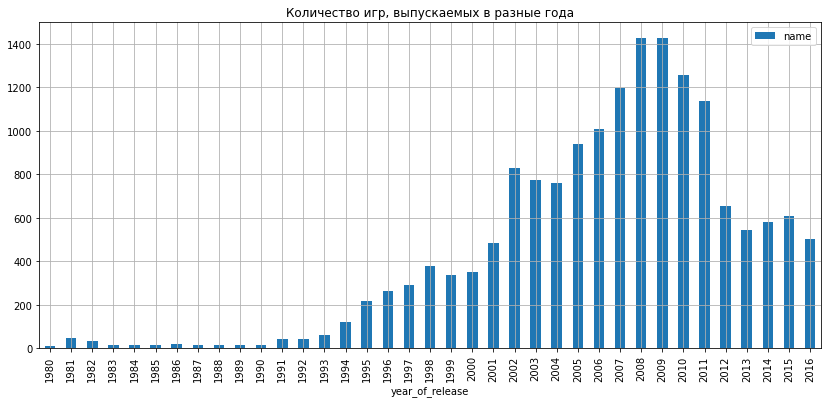

In [22]:
# для наглядности построим гистограмму по выпуску игр в разные года

data_pivot_year_of_release.plot(title = 'Количество игр, выпускаемых в разные года', kind = 'bar', grid=True, figsize = (14,6));


**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
Согласно построенному графику, можно сделать следующие выводы:
<br>Данные за все периоды неважны, так как количество выпусков новых игр с 1980 по 2016 года было не постоянным.    
<br>В период с 1980 - 1993 игр выпускалось крайне мало. 
<br>А с 1994 года был совершен прорыв, и до 2008 года включительно игр выпускалось с каждым годом все больше, вместе с развитием компьютерных технологий развивался и рынок игр. 
<br>С 2012 - 2016 год наблюдается резкий спад в индустрии. Возможно, это связано с тем,что в этот период был экономический кризис в стране.  

**3.2 Изменение продаж по платформам**

In [23]:
#построим сводную таблицу для подсчета продаж по каждой платформе и отсортируем по убыванию столбца sum_sales

data_pivot_platform = data.pivot_table(index = ['platform'], values = 'sum_sales' , aggfunc = 'sum').sort_values('sum_sales', ascending = False)
display(data_pivot_platform)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


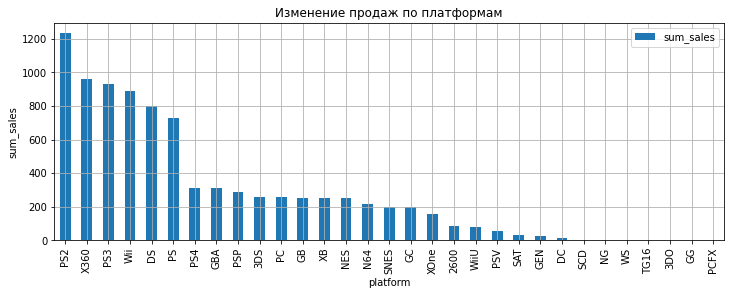

In [24]:
# для наглядности построим гистограмму по суммарным продажам на каждой платформе
data_pivot_platform.plot(title = 'Изменение продаж по платформам', kind = 'bar', grid = True, figsize = (12,4));
plt.ylabel('sum_sales');

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">

Согласно построенному графику, можно сделать следующие выводы:
<br> У первых шести платформ выявлены наибольшие суммарные продажи: PS2, X360, PS3, Wii, DS, PS. Построим распределение по каждой платформе соответственно.  




In [25]:
top_platforms = list(data_pivot_platform.index[:6])
display(top_platforms)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

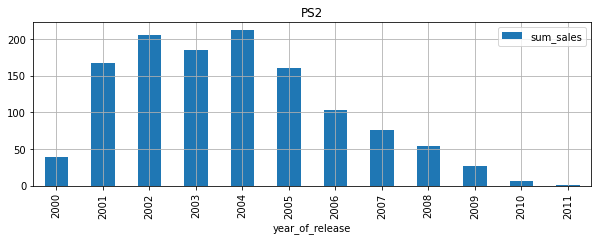

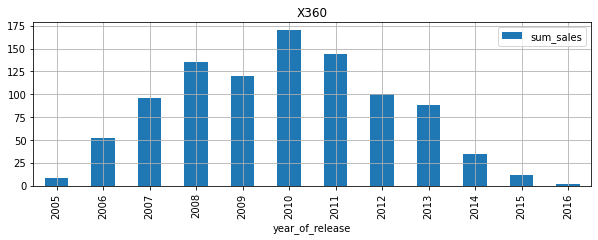

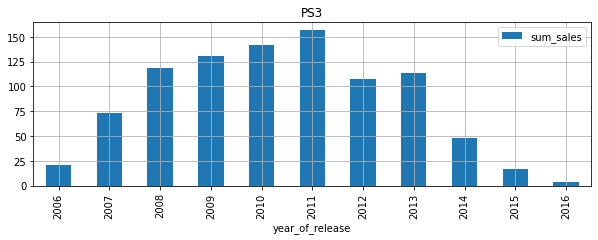

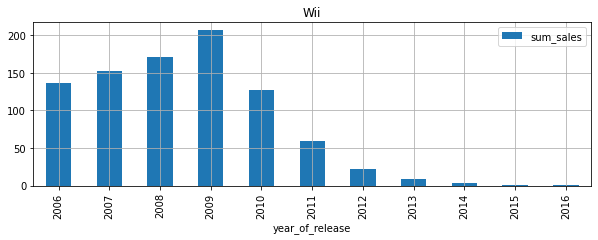

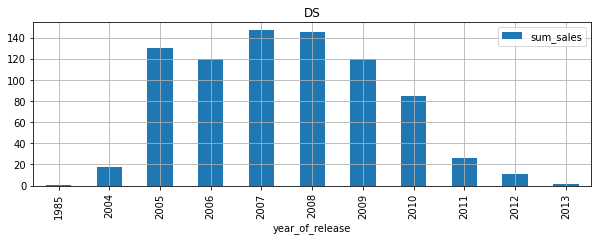

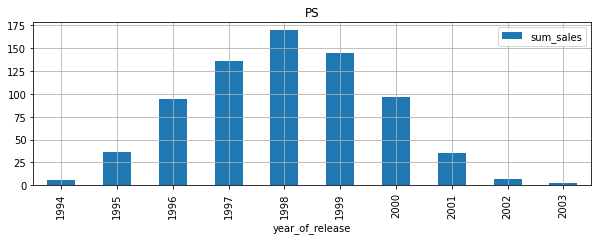

In [26]:
#напишем цикл, который построит сводную таблицу по годам по отобранным 6 платформам и выведет гистограмму
for i in top_platforms:
    data[data['platform'] ==i].pivot_table(index = ['year_of_release'], values = 'sum_sales', aggfunc = 'sum').plot(title = i, kind = 'bar', grid = True, figsize = (10,3))


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">

Согласно построенным распределениям, можно сделать следующие выводы:
<br> В среднем каждые 5-7 лет исчезают старые и появляются новые платформы. Старые платформы исчезают не сразу, а постепенно на протяжении 2-3х лет. 
<br> Для последующего исследовательского анализа будем использовать актуальный период 5 лет, так как, технологии развиваются быстро и в перспективе игры будут  создаваться за более короткий срок. 
<br>Итак, для построения прогноза на 2017 год, будем использовать данные с 2012 - 2016 года.      

In [27]:
#сделаем срез по актуальным годам с 2011 - 2016 года используя query
actual_data = data.query('year_of_release > 2011')
display(actual_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


**3.3 Поиск потенциально прибыльных платформ**

In [28]:
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [29]:
#построим сводную таблицу для подсчета продаж по каждой платформе и отсортируем по убыванию столбца sum_sales

best_platform = actual_data.pivot_table(index=['platform'], values = 'sum_sales', aggfunc = 'sum').sort_values('sum_sales' , ascending = False)
display(best_platform)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


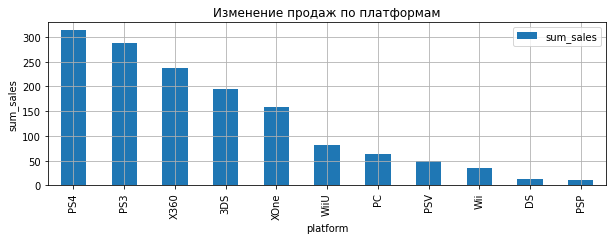

In [30]:
# для наглядности построим гистограмму по суммарным продажам на каждой платформе
best_platform.plot(title = 'Изменение продаж по платформам', kind = 'bar', grid = True, figsize = (10,3));
plt.ylabel('sum_sales');

In [31]:
#построим сводную таблицу для платформ по каждому году с 2012-2016
actual_data_pivot_platform = actual_data.pivot_table(index = ['platform', 'year_of_release'], values = 'sum_sales' , aggfunc = 'sum')
display(actual_data_pivot_platform)

sum_sales
platform year_of_release           
3DS      2012                 51.36
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       2012                 11.01
         2013                  1.54
PC       2012                 23.22
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS3      2012                107.36
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      2012                  7.69
         2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      2012                 16.19
         2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">

Согласно построенному графику, можно сделать следующие выводы:
<br> Лидеры по продажам платформы: PS4, PS3, XOne, 3DS и X360.
<br> На убыль идут следующие платформы: PS3, X360, DS, Wii и PSP соотвественно. 
<br>Продажи растут у приставки PS4 и XOne.


**3.4 Глобальные продажи игр в разбивке по платформам**

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,1312.000000,1531.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,72.258384,6.636120,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,12.687087,1.569033,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


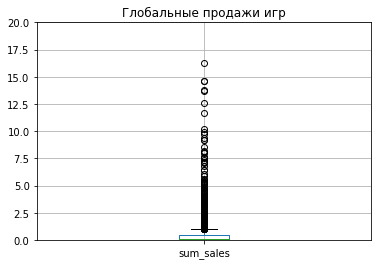

In [32]:
#построим график «ящик с усами» по глобальным продажам игр
actual_data.boxplot('sum_sales')
plt.title('Глобальные продажи игр')
plt.ylim(0, 20)
actual_data.describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

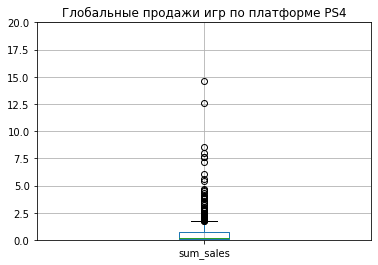

In [33]:
PS4 = actual_data.query("platform == 'PS4'")
PS4.boxplot('sum_sales')
plt.title('Глобальные продажи игр по платформе PS4')
plt.ylim(0,20)
PS4['sum_sales'].describe()


count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: sum_sales, dtype: float64

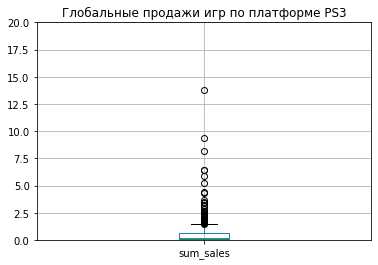

In [34]:
PS3 = actual_data.query("platform == 'PS3'")
PS3.boxplot('sum_sales')
plt.title('Глобальные продажи игр по платформе PS3')
plt.ylim(0,20)
PS3['sum_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

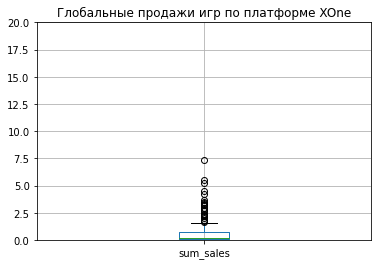

In [35]:
XOne = actual_data.query("platform == 'XOne'")
XOne.boxplot('sum_sales')
plt.title('Глобальные продажи игр по платформе XOne')
plt.ylim(0,20)
XOne['sum_sales'].describe()

count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: sum_sales, dtype: float64

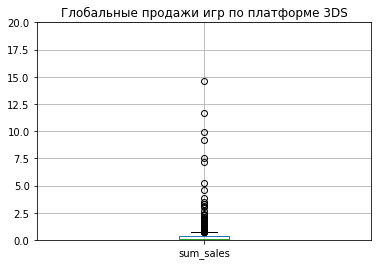

In [36]:
_3DS = actual_data.query("platform == '3DS'")
_3DS.boxplot('sum_sales')
plt.title('Глобальные продажи игр по платформе 3DS')
plt.ylim(0,20)
_3DS['sum_sales'].describe()

count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: sum_sales, dtype: float64

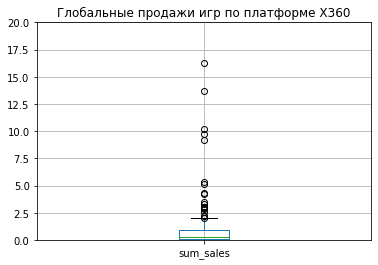

In [37]:
X360 = actual_data.query('platform == "X360"')
X360.boxplot('sum_sales')
plt.title('Глобальные продажи игр по платформе X360')
plt.ylim(0,20)
X360['sum_sales'].describe()

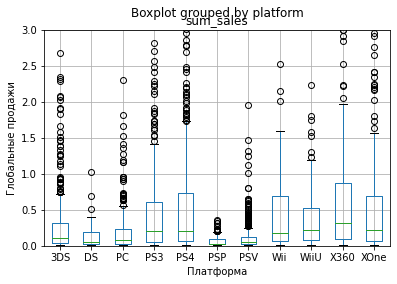

In [38]:
#построим ящики для каждой платформы на одном графике
actual_data.boxplot(column = 'sum_sales', by='platform')
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10)
plt.ylim(0,3);


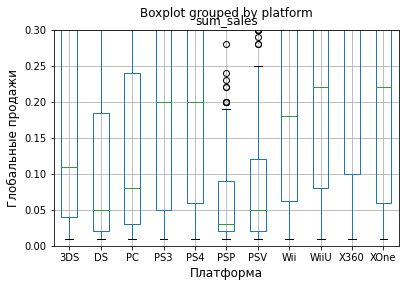

In [39]:
#так как на полученном графике выше видны только выбросы, построим дополнительный график
actual_data.boxplot(column = 'sum_sales', by='platform')
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,0.3);

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
По построенным графикам ящик с усами можно сделать следующие выводы за период с 2012-2016 год:
<br> 1. По платформе PS4 суммарная средняя выручка 801 тысяча, максимальный доход от продаж составил 14.63 млн.
<br> 2. По платформе PS3 суммарная средняя выручка 585 тысяч, максимальный доход от продаж составил 21 млн.
<br> 3. По платформе XOne суммарная средняя выручка 645 тысяч, максимальный доход от продаж составил 7.3 млн.
<br> 4. По платформе 3DS суммарная средняя выручка 491 тысяча, максимальный доход от продаж составил 14.6 млн.
<br> 5. По платформе X360 суммарная средняя выручка 810 тысяч, максимальный доход от продаж составил 16.2 млн.  
    
<br> Диаграмма ящик с усами показала, что:
    медианные продажи по платформам PS4,PS3 и XOne практически одинаковые. Платформа 3DS обладает самой низкой медианной выручкой за период с 2012-2016 года. Топовая медианная выручка за анализируемый период у платформы X360.
    


**3.5 Диаграмма рассеяния и расчет корреляции между отзывами и продажами**

In [40]:
PS4_critic_user = PS4.loc[:,['sum_sales', 'critic_score', 'user_score']]
PS4_critic_user.head()

,sum_sales,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


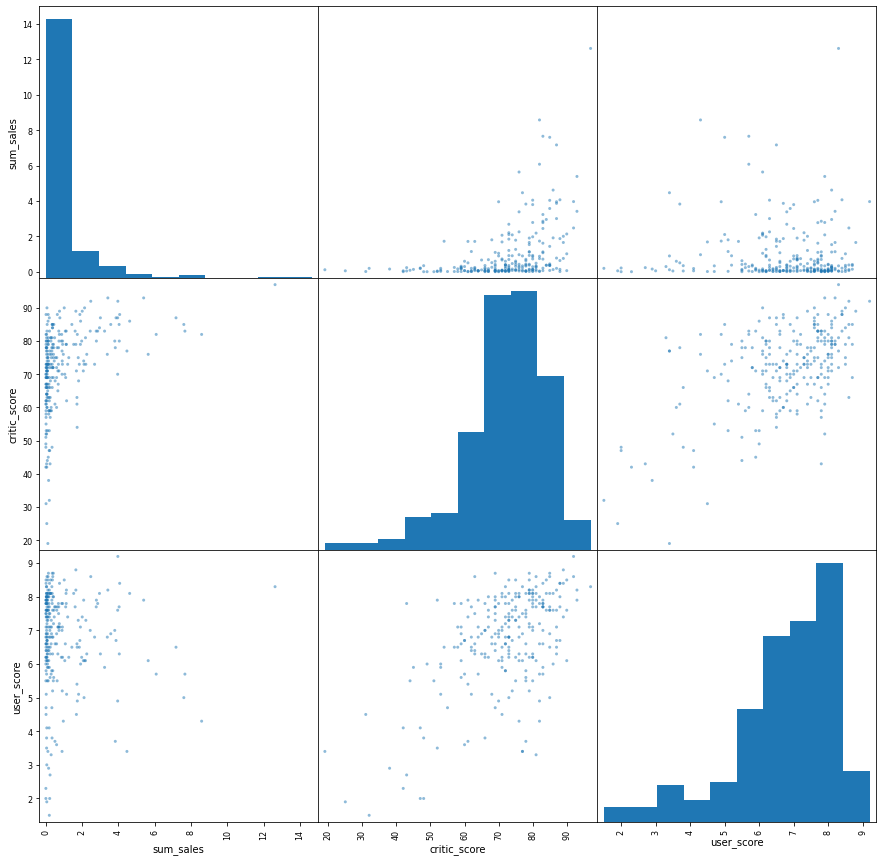

In [41]:
# построим диаграмму рассеяния для PS4
pd.plotting.scatter_matrix(PS4_critic_user, figsize=(15, 15))
PS4_critic_user.corr()

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Выявлена линейная зависимость между оценкой критиков и суммарной выручкой по платформе PS4. А также наблюдается корреляция между оценкой пользователей и оценкой критиков. 

In [42]:
PS3_critic_user = PS3.loc[:,['sum_sales', 'critic_score', 'user_score']]
PS3_critic_user.head()

,sum_sales,critic_score,user_score
16,21.05,97.0,8.2
34,13.79,83.0,5.3
69,9.36,71.0,2.6
81,8.17,88.0,6.6
126,6.46,86.0,4.3


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


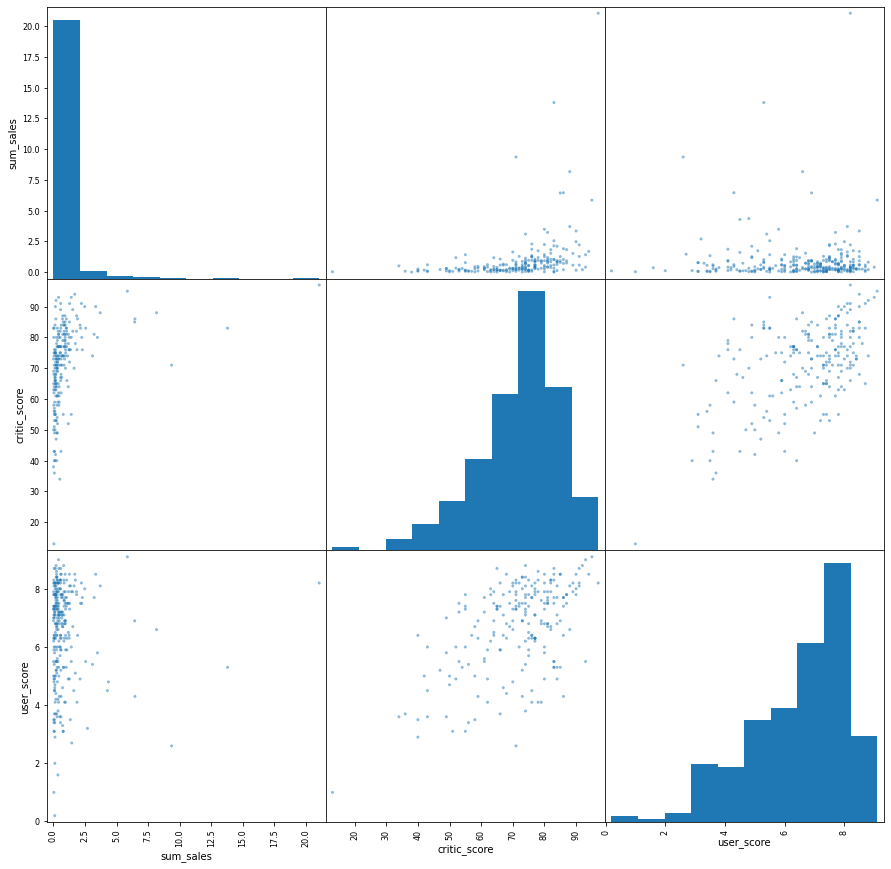

In [43]:
# построим диаграмму рассеяния для PS3

pd.plotting.scatter_matrix(PS3_critic_user, figsize=(15, 15));
PS3_critic_user.corr()

In [44]:
XOne_critic_user = XOne.loc[:,['sum_sales', 'critic_score', 'user_score']]
XOne_critic_user.head()

,sum_sales,critic_score,user_score
99,7.39,NaN,NaN
165,5.47,97.0,7.9
179,5.26,81.0,5.4
242,4.49,84.0,6.4
270,4.22,88.0,6.2


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


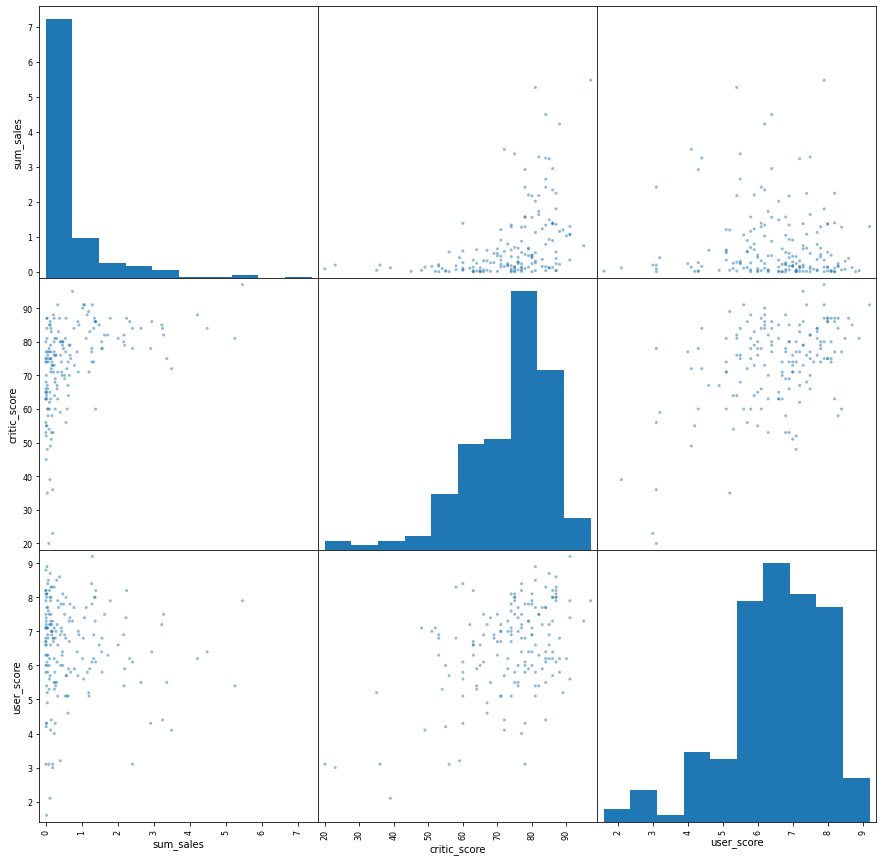

In [45]:
# построим диаграмму рассеяния для XOne

pd.plotting.scatter_matrix(XOne_critic_user, figsize=(15, 15));
XOne_critic_user.corr()

In [46]:
X360_critic_user = X360.loc[:,['sum_sales', 'critic_score', 'user_score']]
X360_critic_user.head()

,sum_sales,critic_score,user_score
23,16.27,97.0,8.1
35,13.68,83.0,4.8
60,10.24,73.0,2.6
66,9.71,87.0,7.0
72,9.18,NaN,NaN


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


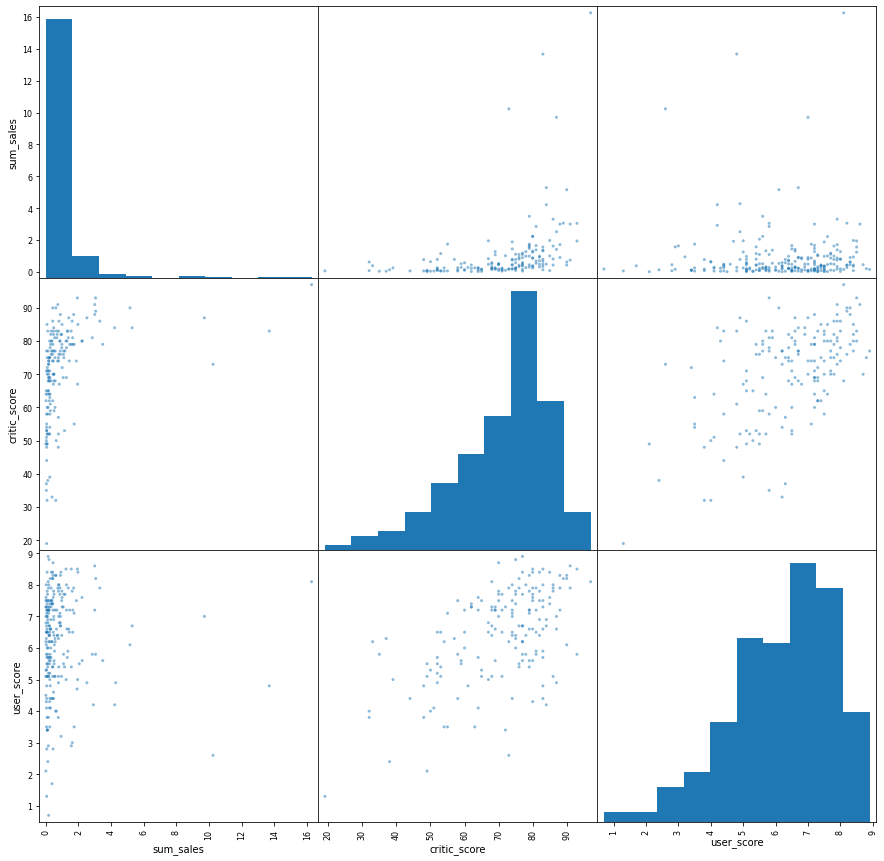

In [47]:
# построим диаграмму рассеяния для X360

pd.plotting.scatter_matrix(X360_critic_user, figsize=(15, 15));
X360_critic_user.corr()

In [48]:
_3DS_critic_user = _3DS.loc[:,['sum_sales', 'critic_score', 'user_score']]
_3DS_critic_user.head()

,sum_sales,critic_score,user_score
33,14.60,NaN,NaN
47,11.68,NaN,NaN
62,9.90,78.0,7.2
73,9.17,88.0,8.7
96,7.55,NaN,NaN


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.320803,0.197583
critic_score,0.320803,1.000000,0.722762
user_score,0.197583,0.722762,1.000000


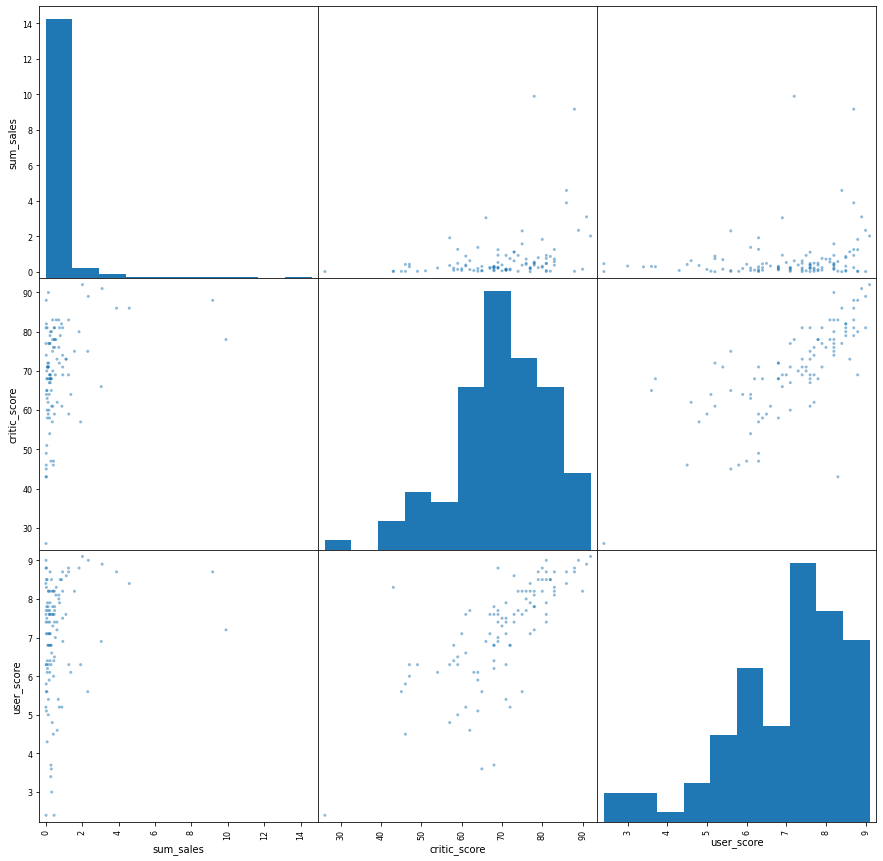

In [49]:
# построим диаграмму рассеяния для 3DS

pd.plotting.scatter_matrix(_3DS_critic_user, figsize=(15, 15));
_3DS_critic_user.corr()

**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Платформа PS4 имеет очень схожие связи между остальными четырьмя платформами (PS3, XOne, X360 и 3DS).
    

**3.6 Общее распределение игр по жанрам**

In [50]:
#построим сводную таблицу по жанрам по всем регионам
genre_pivot = actual_data.pivot_table(index=['genre'], values = 'sum_sales', aggfunc = 'mean').sort_values('sum_sales' , ascending = False)
display(genre_pivot)

,sum_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Самыми прибыльными являются жанры Shooter, Platform и Sports по средней выручке за анализируемый период. Самые низкие продажи у жанров Adventure и Puzzle. Головоломки наименее популярны в период с 2012-2016 года, не пользовались спросом у игроков. 

### Составьте портрет пользователя каждого региона

**4.1.Найдем самые популярные платформы (топ-5) для каждого региона: Северной Америки, Европы и Японии.**

In [51]:
#продажи в Северной Америке
na_platform_pivot = pd.pivot_table(actual_data, index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_platform_pivot)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [52]:
#продажи в Европе
eu_platform_pivot = pd.pivot_table(actual_data, index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_platform_pivot)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [53]:
#продажи в Японии
jp_platform_pivot = pd.pivot_table(actual_data, index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_platform_pivot)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Самые популярные платформы (топ-5) в Северной Америке: X360, PS4, PS3, XOne и 3DS.
<br>Самые популярные платформы (топ-5) в Европе: PS4, PS3, X360, XOne и 3DS.
<br>Самые популярные платформы (топ-5) в Японии: 3DS, PS3, PSV, PS4, WiiU. 

**4.2.Найдем самые популярные жанры (топ-5) для каждого региона: Северной Америки, Европы и Японии.**

In [54]:
#подсчет популярных жанров в Северной Америке
na_genre_pivot = pd.pivot_table(actual_data, index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_genre_pivot)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19
Platform,25.38
Fighting,19.79
Racing,17.22
Adventure,8.92


In [55]:
#подсчет популярных жанров в Европе
eu_genre_pivot = pd.pivot_table(actual_data, index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre_pivot)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29
Misc,26.32
Platform,21.41
Simulation,14.55
Fighting,10.79


In [56]:
#подсчет популярных жанров в Японии
jp_genre_pivot = pd.pivot_table(actual_data, index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_genre_pivot)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44
Shooter,9.23
Platform,8.63
Adventure,8.24
Sports,8.01


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Самые популярные жанры (топ-5) в Северной Америке: Action, Shooter, Sports, Role-Playing и Misc.
<br>Самые популярные жанры (топ-5) в Европе: Action, Shooter, Sports, Role-Playing и Racing.
<br>Самые популярные жанры (топ-5) в Японии: Role-Playing, Action, Misc, Simulation, Fighting. 
<br>Американские и Европейские игроки имеют очень схожие предпочтения по жанрам, в отличие от Японских тенденций. 

**4.3.Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [57]:
#влияние рейтинга ESRB в Северной Америке
na_rat_pivot = pd.pivot_table(actual_data, index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display(na_rat_pivot)

,na_sales
rating,
M,231.57
E,114.37
no_rating,103.31
E10+,75.70
T,66.02


In [58]:
#влияние рейтинга ESRB в Европе
eu_rat_pivot = pd.pivot_table(actual_data, index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_rat_pivot)

,eu_sales
rating,
M,193.96
E,113.03
no_rating,91.50
E10+,55.37
T,52.96


In [59]:
#влияние рейтинга ESRB в Японии
jp_rat_pivot = pd.pivot_table(actual_data, index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display(jp_rat_pivot)

,jp_sales
rating,
no_rating,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
<br> Да, рейтинг по возрасту очень влияет на продажи. Как и в предыдущих сравнениях портрета пользователя каждого региона, получилось, что Америка и Европа снова схожи по возрастной категории. Наиболее играющая группа М, т.е. с рейтингом 17 лет и больше. В Японии иная ситуация, там играют с более раннего возраста.
    
<br>  В Японии игры без рейтинга ESRB занимают большую долю рынка, по сравнению с другими. Это может быть связано с тем, что в Японии сложная система оценки, как правило, оценку сначала проводят обычные граждане, окончательное решение принимается ESRB на основании отзывов. 

### Проверьте гипотезы

**5.1 Гипотеза №1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Итак, сформулируем нулевую и альтернативную гипотезу (H_0 и H_a):
<br> H_0: Средние пользовательские рейтинги платформы Xbox One = Средние пользовательские рейтинги платформы PC.
<br> H_a: Средние пользовательские рейтинги платформы Xbox One ≠ Средние пользовательские рейтинги платформы PC.
<br> Примем alpha = 0.05

Исключим пропущенные значения в столбце user_score, так как для расчета pvalue не должно быть пропусков в пользовательских рейтингах.

In [60]:
XOne_data = actual_data.query('platform == "XOne"')['user_score'].dropna()
PC_data = actual_data.query('platform == "PC"')['user_score'].dropna()

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(XOne_data, PC_data, equal_var = False )

# alpha = критический уровень статистической значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Для оценки гипотезы применяем тест Стюдента. 
<br>По результатам теста можно получить два варианта ответа: отвергаем нулевую гипотезу или не получилось  отвергуть нулевую гипотезу. 
Нулевая гипотеза отвергается в случае, если p-value оказывается меньше критического уровня статистической значимости (alpha). 
<br> У нас p-значение = 0,548, что больше alpha, следовательно нулевая гипотеза не отвергается, а подтверждается, т.е. Средние пользовательские рейтинги платформы Xbox One действительно = Средние пользовательские рейтинги платформы PC. 
<br> Значение p-value показывает: вероятность случайно получить равные средние пользовательские рейтинги платформ Xbox One и PC почти 55%, т.е. рейтинги этих платформ в целом похожи. 

**5.2 Гипотеза №2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Итак, сформулируем нулевую и альтернативную гипотезу (H_0 и H_1):
<br> H_0: Средние пользовательские рейтинги жанров Action  = Средние пользовательские рейтинги жанров  Sports.
<br> H_1: Средние пользовательские рейтинги жанров Action ≠ Средние пользовательские рейтинги жанров  Sports.
<br> Примем alpha = 0.05

In [61]:
user_rating_action = actual_data.query('genre == "Action"')['user_score'].dropna()
user_rating_sports = actual_data.query('genre == "Sports"')['user_score'].dropna()

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(user_rating_action, user_rating_sports)

# alpha = критический уровень статистической значимости
alpha = .05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод**
<p></p>
<div style="border:solid green 2px; padding: 20px">
Для оценки гипотезы применяем тест Стюдента. 
<br>По результатам теста можно получить два варианта ответа: отвергаем нулевую гипотезу или не получилось  отвергуть нулевую гипотезу. 
Нулевая гипотеза отвергается в случае, если p-value оказывается меньше критического уровня статистической значимости (alpha). 
<br> У нас p-значение меньше alpha, следовательно отвергаем нулевую гипотезу, т.е. Средние пользовательские рейтинги жанров Action и Sports действительно разные. 

### Общий вывод

**Вывод**

<p></p>

<div style="border:solid green 2px; padding: 20px">
<br>**Предобработка данных**:
<br><br>В ходе проведенного исследования был изучен весь датафрейм, выявлены пропуски, которые затем заполнили, по возможности, необходимыми данными. Также была проведена проверка на типы данных в каждом столбце. 
<br>В столбцах с рейтингами 'critic_score' и 'user_score' пропуски заполнять не нужно, так как после их заполнения можно получить неточные результаты в статистическом анализе. 
<br>В столбце 'rating' заменили все пропуски на 'no_rating'.
<br>Пропуски лучше заполнять реальными данными, если есть возможность - например, зайти на сайт и попытаться найти информацию или в реальном проекте можно было бы выявить причину появления пропусков, затем попросить программистов восстановить данные, если это возможно. 
<br>При предобработке данных не были выявлены явные дубликаты во всех столбцах датафрейма. 
<br>Исходный датафрейм был дополнен новым расчетом, добавлен столбец с суммарными продажами во всех регионах.
    <br><br>**Исследовательский анализ данных показал**:
 <br><br>1. В период с 1980 - 1993 игр выпускалось крайне мало. А с 1994 года был совершен прорыв, и до 2008 года включительно игр выпускалось с каждым годом все больше, вместе с развитием компьютерных технологий развивался и рынок игр. С 2012 - 2016 год наблюдается резкий спад в индустрии. Возможно, это связано с тем,что в этот период был экономический кризис в стране.
 <br><br>2. Наибольшие суммарные продажи за весь анализируемый период с 1980 - 2016 года выявлены у шести платформ: PS2, X360, PS3, Wii, DS, PS. 
<br> В среднем каждые 5-7 лет исчезают старые и появляются новые платформы. Старые платформы исчезают не сразу, а постепенно на протяжении 2-3х лет. 
<br> Для последующего исследовательского анализа использовался актуальный период 5 лет, так как, технологии развиваются быстро и в перспективе игры будут  создаваться за более короткий срок.
 <br><br>3. Итак, в период с 2012 - 2016 года лидеры по продажам следующие платформы: PS4, PS3, XOne, 3DS и X360.
<br> На убыль по продажам идут платформы: PS3, X360, DS, Wii и PSP соотвественно. 
<br>Продажи растут у приставки PS4 и XOne.
<br> По платформе PS4 суммарная средняя выручка 801 тысяча, максимальный доход от продаж составил 14.63 млн.
<br> По платформе PS3 суммарная средняя выручка 585 тысяч, максимальный доход от продаж составил 21 млн.
<br> По платформе XOne суммарная средняя выручка 645 тысяч, максимальный доход от продаж составил 7.3 млн.
<br> По платформе 3DS суммарная средняя выручка 491 тысяча, максимальный доход от продаж составил 14.6 млн.
<br> По платформе X360 суммарная средняя выручка 810 тысяч, максимальный доход от продаж составил 16.2 млн.  
<br><br>4. Выявлена линейная зависимость между оценкой критиков и суммарной выручкой по платформе PS4. А также наблюдается корреляция между оценкой пользователей и оценкой критиков. 
<br><br>5. Платформа PS4 имеет очень схожие связи между остальными четырьмя платформами (PS3, XOne, X360 и 3DS).
<br><br>6. Самыми прибыльными являются жанры Shooter, Platform и Sports по средней выручке за анализируемый период. Самые низкие продажи у жанров Adventure и Puzzle. Головоломки наименее популярны в период с 2012-2016 года, не пользовались спросом у игроков.
<br><br>7. Самые популярные платформы (топ-5) в Северной Америке: X360, PS4, PS3, XOne и 3DS.
<br>Самые популярные платформы (топ-5) в Европе: PS4, PS3, X360, XOne и 3DS.
<br>Самые популярные платформы (топ-5) в Японии: 3DS, PS3, PSV, PS4, WiiU.
<br><br>8. Самые популярные жанры (топ-5) в Северной Америке: Action, Shooter, Sports, Role-Playing и Misc.
<br>Самые популярные жанры (топ-5) в Европе: Action, Shooter, Sports, Role-Playing и Racing.
<br>Самые популярные жанры (топ-5) в Японии: Role-Playing, Action, Misc, Simulation, Fighting. 
<br>Американские и Европейские игроки имеют очень схожие предпочтения по жанрам, в отличие от Японских тенденций. 
<br><br>9. Рейтинг по возрасту очень влияет на продажи. Как и в предыдущих сравнениях портрета пользователя каждого региона, получилось, что Америка и Европа снова схожи по возрастной категории. Наиболее играющая группа М, т.е. с рейтингом 17 лет и больше. В Японии иная ситуация, там играют с более раннего возраста.
<br><br>**Проверка гипотез**:
<br><br> Гипотеза №1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Данная гипотеза подтвердилась.
<br> Гипотеза №2 "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергается нулевая гипотеза.

<br> **Рекомендации по запуску рекламных кампаний на 2017 год**: 

1. При создании игр учитывать пользовательский спрос - возраст от 17 лет.
2. Необходимо опираться при создании будущих игр на последние современные технологии и наиболее пользующиеся спросом игры для каждого региона. Как выяснилось, аудитория в Северной Америке, Европе и Японии разная и предпочтение по жанрам игр отличается.
3. Выбирать жанр только после аналитического исследования, в Северной Америке и Европе - самый популярный жанр Action. Для Японии - Role-Playing.